In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In questo notebook studio il metodo per determinare il semi-asse maggiore del disco. In particolare mi concentro sui punti critici che rischiano di rendere inefficace lo studio.

In [3]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;">Mappatura dell'energia </span>

<center>

Considero una condizione ostica, ossia quella che si verifica nel caso dell'output 61.

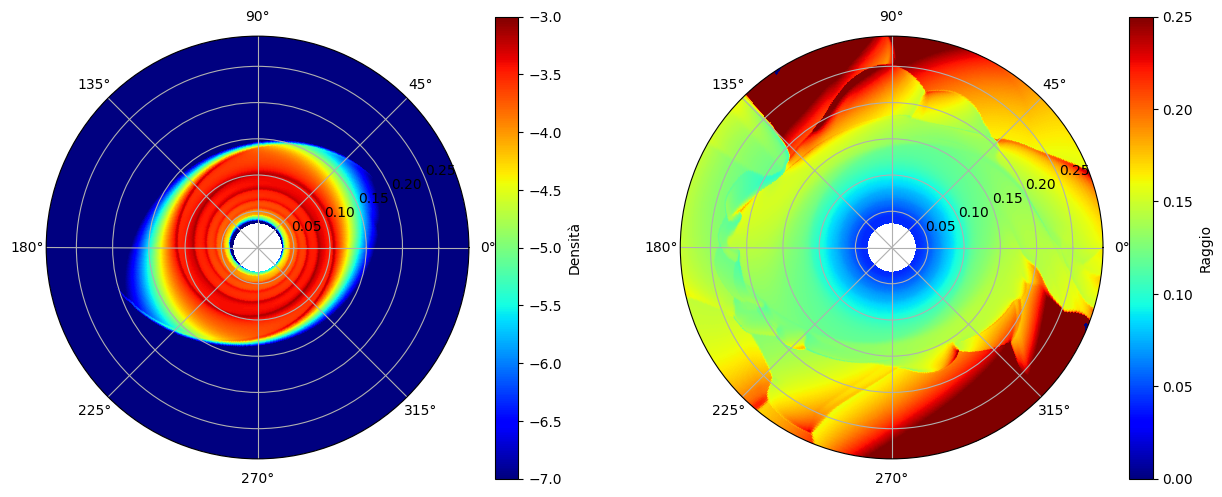

In [3]:
rho = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasdens61.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvx61.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvy61.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.5, 385)
r_plot = np.zeros(384)
for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] + r[i])/2
#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)

sax_mag = np.zeros((384, 1152))


#Calcolo le energie
ene = np.zeros((384, 1152))
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        ene[i, j] = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
        sax_mag[i, j] = -1/(2 * ene[i, j] * 12)

#Stampo in coordinate polari la densità del disco e l'energia
#Metto in evidenza le regioni ad energia positiva
fig = plt.figure(figsize=(15, 6))

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(3.5/12)

#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
cax = ax2.pcolormesh(Theta, R, sax_mag, cmap='jet', vmin = 0, vmax =0.25)
plt.colorbar(cax, label='Raggio')
ax2.set_rmin(0)
ax2.set_rmax(3.5/12)

plt.show()

<center>

# <span style="color:blue;"> Pongo un limite alla densità </span>

<center>

Il semi-asse maggiore del disco considerato è: -13.24 a


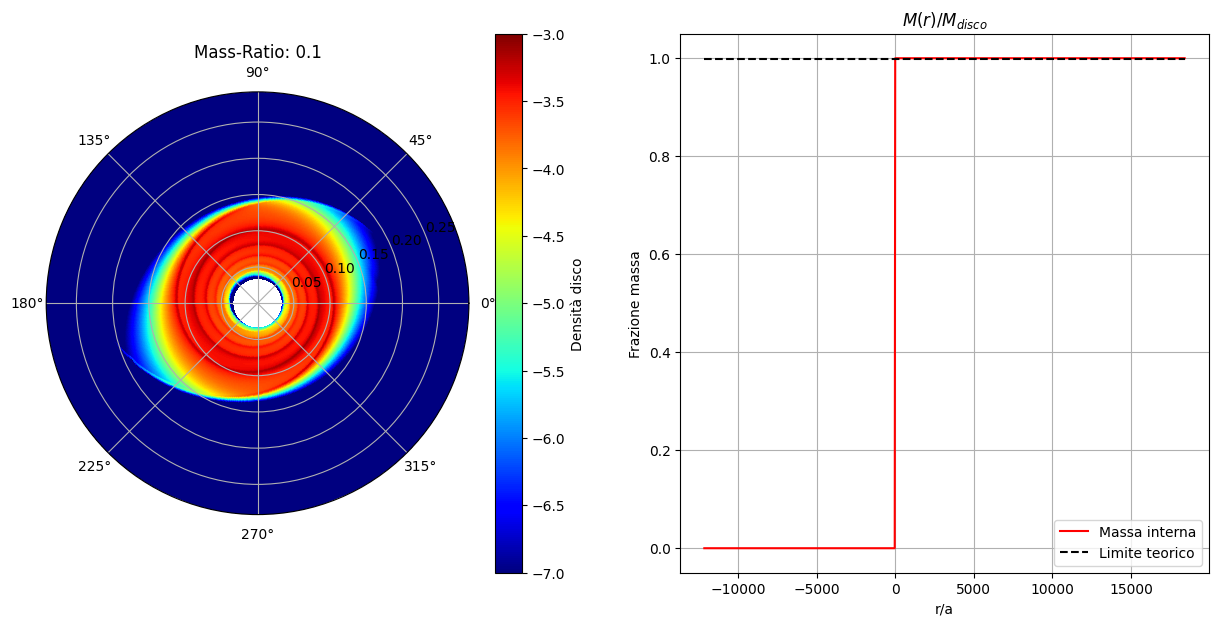

In [4]:
rho = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasdens61.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvx61.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvy61.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.5, 385)
r_plot = np.zeros(384)
for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] + r[i])/2
#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)

min_ax = 0; max_ax = 0
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        if np.log10(rho[i, j]) > -40:
            ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
            ax_appo = - 1.0/(2 * ene* 12)

            #Condizioni sull'asse maggiore
            if ax_appo < min_ax:
                min_ax = ax_appo
            
            elif ax_appo > max_ax:
                max_ax = ax_appo

#Riempio vettore delle masse progressive
sax_mag = np.linspace(min_ax, max_ax, 1000)
m_prog = np.zeros(1000)

#Determino la massa dei vari anellini
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        if np.log10(rho[i, j]) > -40:
            ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
            ax_appo = - 1.0/(2 * ene* 12)

             #Calcolo massa nei vari anelli
            ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
            m_prog[ind] += rho[i, j] * area
#Creo le masse progressive
for i in range(0, len(m_prog)):
    if i != 0:
        m_prog[i] = m_prog[i-1] + m_prog[i]

#Faccio controllo per il raggio
for i in range(0, len(m_prog)):
    if m_prog[i] > 0.999 * m_prog[999]:
        rag = sax_mag[i]
        print("Il semi-asse maggiore del disco considerato è: " + str(round(rag, 3)) + ' a')
        break

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 2, 1, projection='polar')
#-----------------------------------#
#      Disegno grafico polare       #
#-----------------------------------#

#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(3.5/12.0)
ax.set_title(f'Mass-Ratio: 0.1')

ax = fig.add_subplot(1, 2, 2)


#Valore per confronto teorico
teo_val = np.zeros(len(m_prog))
for i in range(0, len(m_prog)):
    teo_val[i] = 0.999

ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
ax.set_title(r'$M\left(r\right)/M_{disco}$')
ax.set_xlabel(r'r/a')
ax.set_ylabel('Frazione massa')
ax.legend(loc='best')
ax.grid(True)


plt.show()

### Output finale

Il semi-asse maggiore del disco considerato è: 0.131 a
Il semi-asse maggiore del disco considerato è: 0.193 a
Il semi-asse maggiore del disco considerato è: 0.219 a
Il semi-asse maggiore del disco considerato è: 0.265 a
Il semi-asse maggiore del disco considerato è: 0.32 a
Il semi-asse maggiore del disco considerato è: 0.352 a
Il semi-asse maggiore del disco considerato è: 0.45 a


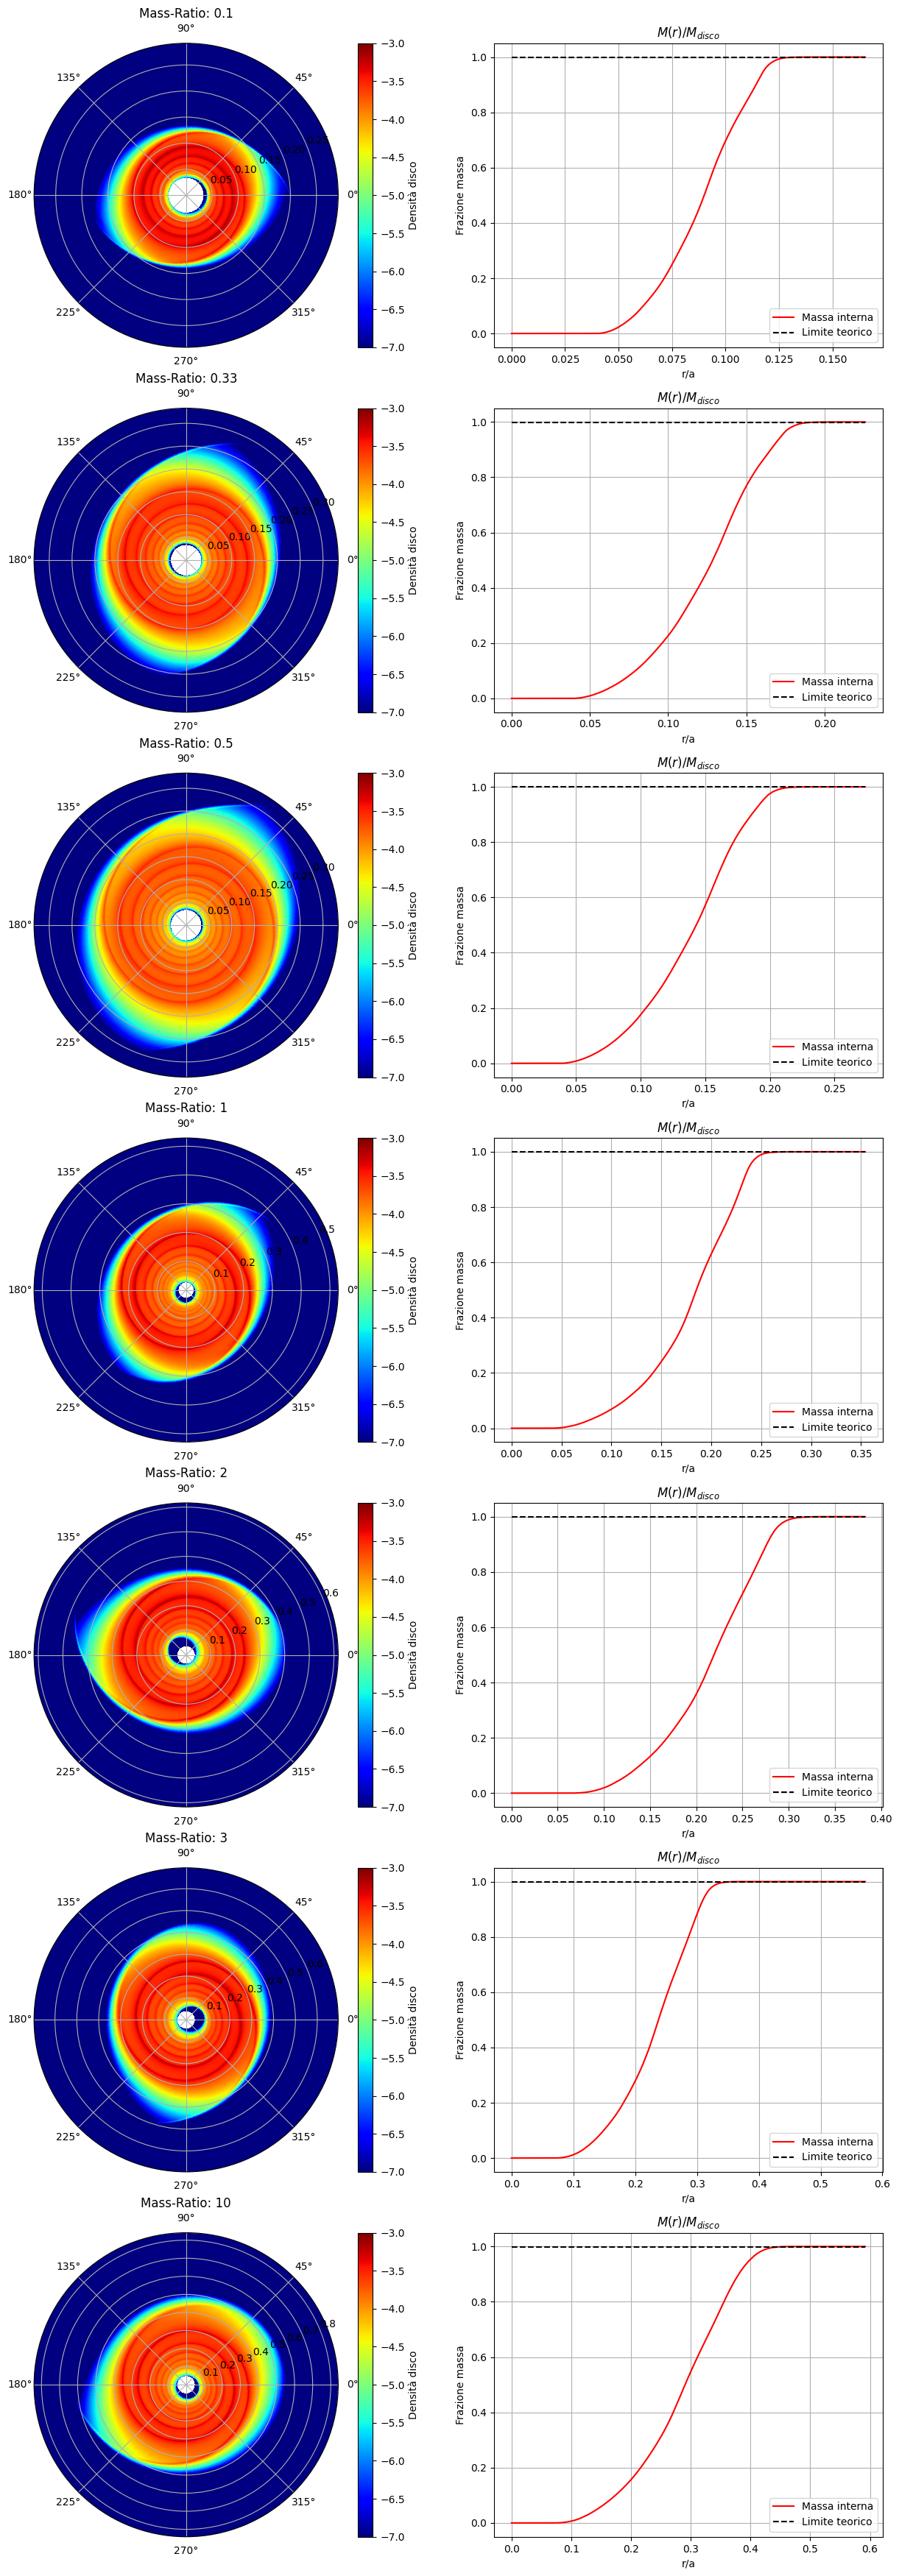

In [5]:
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])

fig = plt.figure(figsize=(15, 44))

for h in range(0, len(massr)):
    rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -10:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -10:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    #Faccio controllo per il raggio
    for i in range(0, len(m_prog)):
        if m_prog[i] > 0.999 * m_prog[999]:
            print("Il semi-asse maggiore del disco considerato è: " + str(round(sax_mag[i], 3)) + ' a')
            break

    ax = fig.add_subplot(7, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(f'Mass-Ratio: '+ massr[h])

    ax = fig.add_subplot(7, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Calcolo dei semi-assi

In [6]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)


for h in range(0, len(massr)):

    #Contenitore per i vari raggi
    rag = np.zeros(num[h])

    for k in range(0, num[h]):

        # Importo i campi necessari
        rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        for i in range(0, len(r_plot)):
            r_plot[i] = (r[i+1] + r[i])/2

        #-----------------------------------------#
        #     Trovo minimo e massimo semi-asse    #
        #-----------------------------------------#

        min_ax = 0; max_ax = 0
        for i in range(0, 384):

            #Calcolo area delle cellette
            area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
            area = area/1152

            for j in range(0, 1152):
                if np.log10(rho[i, j]) > -10:
                    ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                    ax_appo = - 1.0/(2 * ene* dist[h])

                    #Condizioni sull'asse maggiore
                    if ax_appo < min_ax:
                        min_ax = ax_appo
            
                    elif ax_appo > max_ax:
                        max_ax = ax_appo

        #Riempio vettore delle masse progressive
        sax_mag = np.linspace(min_ax, max_ax, 1000) 
        m_prog = np.zeros(1000)

        #Determino la massa dei vari anellini
        for i in range(0, 384):

            #Calcolo area delle cellette
            area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
            area = area/1152

            for j in range(0, 1152):
                if np.log10(rho[i, j]) > -10:
                    ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                    ax_appo = - 1.0/(2 * ene* dist[h])

                    #Calcolo massa nei vari anelli
                    ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                    m_prog[ind] += rho[i, j] * area
        #Creo le masse progressive
        for i in range(0, len(m_prog)):
            if i != 0:
                m_prog[i] = m_prog[i-1] + m_prog[i]

        #Faccio controllo per il raggio
        for i in range(0, len(m_prog)):
            if m_prog[i] > 0.999 * m_prog[999]:
                rag[k] = sax_mag[i]
                break
    
    med = 0
    for k in range(0, len(rag)):
        med += rag[k]
    
    sax_A3_e0[h] = med/len(rag)
    print('Il semi-asse maggiore del disco è pari a: ' + str(round(med/len(rag), 3)) + ' a')  
    

Il semi-asse maggiore del disco è pari a: 0.131 a
Il semi-asse maggiore del disco è pari a: 0.193 a
Il semi-asse maggiore del disco è pari a: 0.219 a
Il semi-asse maggiore del disco è pari a: 0.267 a
Il semi-asse maggiore del disco è pari a: 0.32 a
Il semi-asse maggiore del disco è pari a: 0.353 a
Il semi-asse maggiore del disco è pari a: 0.451 a


<center>

# <span style="color:blue;"> Analizzo casi ad elevata eccentricità della binaria </span>

<center>

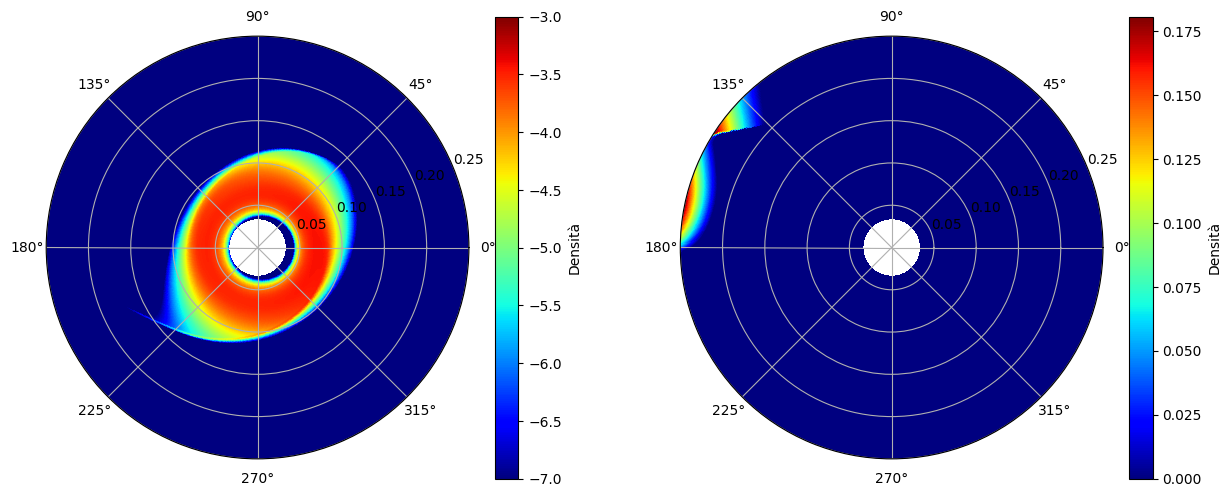

In [7]:
rho = np.fromfile("../Alpha-3/HighEcc/MR0.5/gasdens71.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/HighEcc/MR0.5/gasvx71.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/HighEcc/MR0.5/gasvy71.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.0, 385)
r_plot = np.zeros(384)
for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] + r[i])/2
#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)


#Calcolo le energie
ene = np.zeros((384, 1152))
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        ene[i, j] = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]

#Stampo in coordinate polari la densità del disco e l'energia
#Metto in evidenza le regioni ad energia positiva
fig = plt.figure(figsize=(15, 6))

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(3.0/12)

#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
cax = ax2.pcolormesh(Theta, R, ene, cmap='jet', vmin = 0)
plt.colorbar(cax, label='Densità')
ax2.set_rmin(0)
ax2.set_rmax(3.0/12)

plt.show()

### Cambio limite alla densità?

Il semi-asse maggiore del disco considerato è: 0.104 a


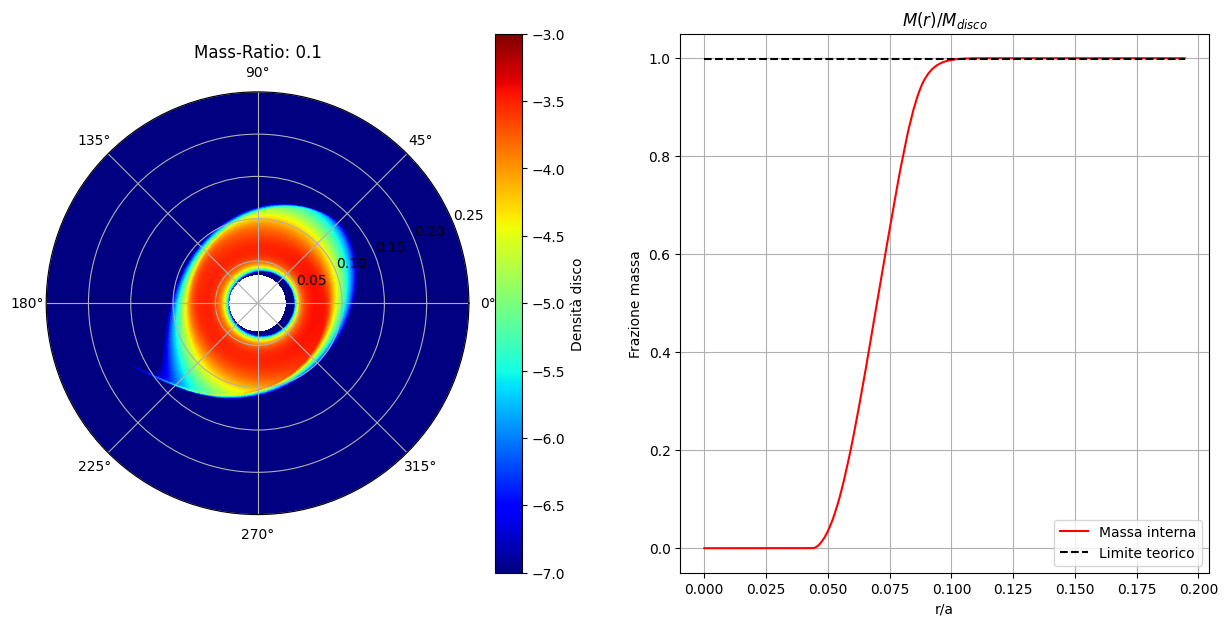

In [8]:
rho = np.fromfile("../Alpha-3/HighEcc/MR0.5/gasdens71.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/HighEcc/MR0.5/gasvx71.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/HighEcc/MR0.5/gasvy71.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.0, 385)
r_plot = np.zeros(384)
for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] + r[i])/2
#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)

min_ax = 0; max_ax = 0
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        if np.log10(rho[i, j]) > -8.5:
            ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
            ax_appo = - 1.0/(2 * ene* 12)

            #Condizioni sull'asse maggiore
            if ax_appo < min_ax:
                min_ax = ax_appo
            
            elif ax_appo > max_ax:
                max_ax = ax_appo

#Riempio vettore delle masse progressive
sax_mag = np.linspace(min_ax, max_ax, 1000)
m_prog = np.zeros(1000)

#Determino la massa dei vari anellini
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        if np.log10(rho[i, j]) > -8.5:
            ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
            ax_appo = - 1.0/(2 * ene* 12)

             #Calcolo massa nei vari anelli
            ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
            m_prog[ind] += rho[i, j] * area
#Creo le masse progressive
for i in range(0, len(m_prog)):
    if i != 0:
        m_prog[i] = m_prog[i-1] + m_prog[i]

#Faccio controllo per il raggio
for i in range(0, len(m_prog)):
    if m_prog[i] > 0.999 * m_prog[999]:
        rag = sax_mag[i]
        print("Il semi-asse maggiore del disco considerato è: " + str(round(rag, 3)) + ' a')
        break

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 2, 1, projection='polar')
#-----------------------------------#
#      Disegno grafico polare       #
#-----------------------------------#

#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(3.0/12.0)
ax.set_title(f'Mass-Ratio: 0.1')

ax = fig.add_subplot(1, 2, 2)


#Valore per confronto teorico
teo_val = np.zeros(len(m_prog))
for i in range(0, len(m_prog)):
    teo_val[i] = 0.999

ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
ax.set_title(r'$M\left(r\right)/M_{disco}$')
ax.set_xlabel(r'r/a')
ax.set_ylabel('Frazione massa')
ax.legend(loc='best')
ax.grid(True)


plt.show()

<center>

# <span style="color:blue;"> Calcolo l'eccentricità del disco </span>

<center>

L'eccentricità del disco è pari a: 0.216


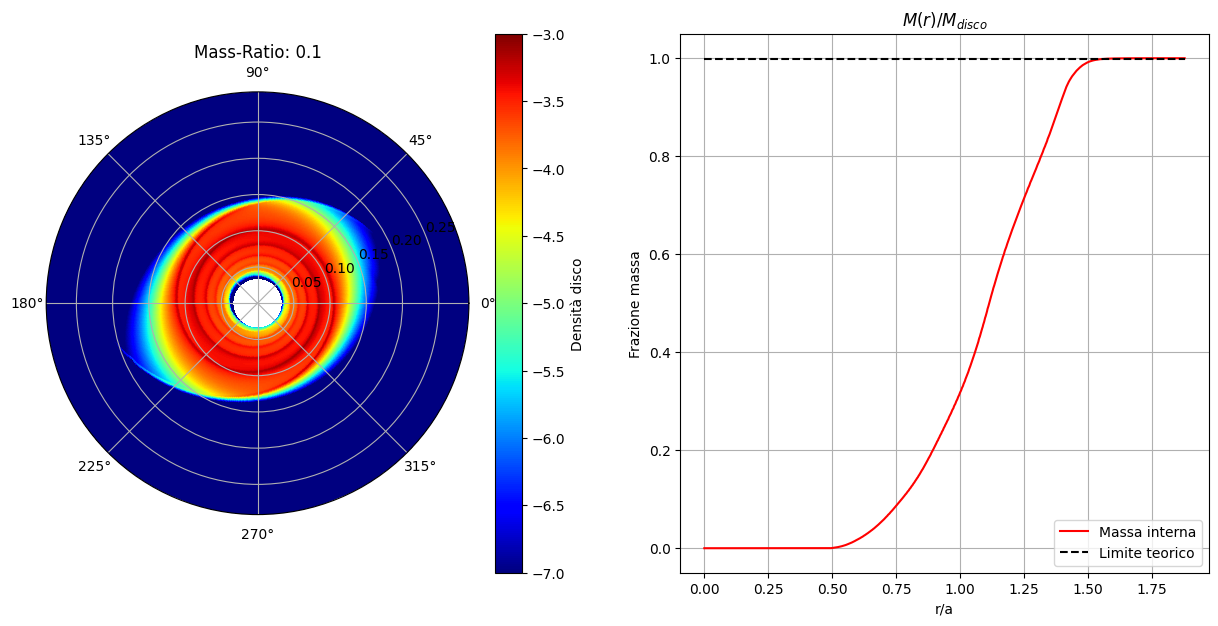

In [9]:
rho = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasdens61.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvx61.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvy61.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.5, 385)
r_plot = np.zeros(384)
for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] + r[i])/2
#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)


#------------------------------------------#
#       Determino massimo e minimo a       #
#------------------------------------------#  

min_ax = 0; max_ax = 0
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        if np.log10(rho[i, j]) > -8.5:
            ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
            ax_appo = - 1.0/(2 * ene)

            #Condizioni sull'asse maggiore
            if ax_appo < min_ax:
                min_ax = ax_appo
            
            elif ax_appo > max_ax:
                max_ax = ax_appo



#------------------------------------------#
#        Determino a di troncamento        #
#------------------------------------------#  

#Riempio vettore delle masse progressive
sax_mag = np.linspace(min_ax, max_ax, 1000)
m_prog = np.zeros(1000)

#Determino la massa dei vari anellini
for i in range(0, 384):

    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        if np.log10(rho[i, j]) > -8.5:
            ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
            ax_appo = - 1.0/(2 * ene)

             #Calcolo massa nei vari anelli
            ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
            m_prog[ind] += rho[i, j] * area

#Creo le masse progressive
for i in range(0, len(m_prog)):
    if i != 0:
        m_prog[i] = m_prog[i-1] + m_prog[i]

ind = 0
#Faccio controllo per il raggio
for i in range(0, len(m_prog)):
    if m_prog[i] > 0.999 * m_prog[999]:
        ind = i
        break


#------------------------------------------#
#       Determino l'eccentricità disco     #
#------------------------------------------#  
ecc = 0
conta = 0
#Determino l'eccentricità del disco
for i in range(0, 384):
    #Calcolo area delle cellette
    area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
    area = area/1152

    for j in range(0, 1152):
        if np.log10(rho[i, j]) > -8.5:
            ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
            ax_appo = - 1.0/(2 * ene)

            if ax_appo > sax_mag[ind-1] and ax_appo < sax_mag[ind+1]:
                ecc += math.sqrt(1 - (pow(1 + rho[i, j] * area, 2) * pow(r_plot[i] * vx[i, j], 2))/(ax_appo))
                conta += 1

print("L'eccentricità del disco è pari a: " + str(round(ecc/conta, 3)))


fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 2, 1, projection='polar')
#-----------------------------------#
#      Disegno grafico polare       #
#-----------------------------------#

#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(3.5/12.0)
ax.set_title(f'Mass-Ratio: 0.1')

ax = fig.add_subplot(1, 2, 2)


#Valore per confronto teorico
teo_val = np.zeros(len(m_prog))
for i in range(0, len(m_prog)):
    teo_val[i] = 0.999

ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
ax.set_title(r'$M\left(r\right)/M_{disco}$')
ax.set_xlabel(r'r/a')
ax.set_ylabel('Frazione massa')
ax.legend(loc='best')
ax.grid(True)


plt.show()

<center>

# <span style="color:blue;"> Espando a tutti i MR </span>

<center>

In [10]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
ecc_A3_e0 = np.zeros(7)

for h in range(0, len(massr)):
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        for i in range(0, len(r_plot)):
            r_plot[i] = (r[i+1] + r[i])/2



        #------------------------------------------#
        #       Determino massimo e minimo a       #
        #------------------------------------------#  

        min_ax = 0; max_ax = 0
        for i in range(0, 384):

            #Calcolo area delle cellette
            area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
            area = area/1152

            for j in range(0, 1152):
                if np.log10(rho[i, j]) > -8.5:
                    ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                    ax_appo = - 1.0/(2 * ene)

                    #Condizioni sull'asse maggiore
                    if ax_appo < min_ax:
                        min_ax = ax_appo
            
                    elif ax_appo > max_ax:
                        max_ax = ax_appo



        #------------------------------------------#
        #        Determino a di troncamento        #
        #------------------------------------------#  

        #Riempio vettore delle masse progressive
        sax_mag = np.linspace(min_ax, max_ax, 1000)
        m_prog = np.zeros(1000)

        #Determino la massa dei vari anellini
        for i in range(0, 384):

            #Calcolo area delle cellette
            area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
            area = area/1152

            for j in range(0, 1152):
                if np.log10(rho[i, j]) > -8.5:
                    ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                    ax_appo = - 1.0/(2 * ene)

                    #Calcolo massa nei vari anelli
                    ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                    m_prog[ind] += rho[i, j] * area

        #Creo le masse progressive
        for i in range(0, len(m_prog)):
            if i != 0:
                m_prog[i] = m_prog[i-1] + m_prog[i]

        ind = 0
        #Faccio controllo per il raggio
        for i in range(0, len(m_prog)):
            if m_prog[i] > 0.999 * m_prog[999]:
                ind = i
                break
            
            
        #------------------------------------------#
        #       Determino l'eccentricità disco     #
        #------------------------------------------#  
        ecc = 0
        conta = 0
        #Determino l'eccentricità del disco
        for i in range(0, 384):
            #Calcolo area delle cellette
            area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
            area = area/1152

            for j in range(0, 1152):
                if np.log10(rho[i, j]) > -8.5:
                    ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                    ax_appo = - 1.0/(2 * ene)

                    if ax_appo > sax_mag[ind-1] and ax_appo < sax_mag[ind+1]:
                        ecc += math.sqrt(1 - (pow(1 + rho[i, j] * area, 2) * pow(r_plot[i] * vx[i, j], 2))/(ax_appo))
                        conta += 1

        ecc_out[k] = ecc/conta

    ecc_A3_e0[h] = np.sum(ecc_out)/len(ecc_out)
    print("L'eccentricità del disco con mass-ratio: " + massr[h] + " è pari a: " + str(round(ecc_A3_e0[h], 3)))

L'eccentricità del disco con mass-ratio: 0.1 è pari a: 0.216
L'eccentricità del disco con mass-ratio: 0.33 è pari a: 0.195


KeyboardInterrupt: 

<center>

# <span style="color:blue;"> Facciamo le cose bene </span>

<center>

### Calcolo semi-asse maggiore

In [11]:
rho = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasdens61.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvx61.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvy61.dat").reshape(384, 1152)

#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.5, 385)
r_plot = np.zeros((384, 1152))
for i in range(0, 384):
    for j in range(0, 1152):
        r_plot[i, j] = (r[i+1] + r[i])/2

#Valuto area delle celle
area = np.zeros((384, 1152))
for i in range(0, 383):
    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo


#Calcolo energia e massa delle cellette
ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
mas = rho * area

#Calcolo il semi-asse
ax = - 1.0/(2 * ene * 12)
ax.reshape(384 * 1152)
mas.reshape(384 * 1152)

#Creo contenitore per masse progressive 
m_prog = []
sax_mag = np.linspace(0, 0.5, 1000)

#Creo le masse progressive
for i in range(0, len(sax_mag)):
    m_prog.append(mas[ax < sax_mag[i]].sum())

m_prog = np.array(m_prog)
for i in range(0, len(sax_mag)):
    if m_prog[i] >= 0.999 * m_prog[999]:
        ind = i
        break

print("Il raggio di troncamento è: " + str(round(sax_mag[ind], 3)) + " a")


Il raggio di troncamento è: 0.132 a


### Considero mass-ratio per eccentricità fissata

In [ ]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A3_e0[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con mass-ratio " + massr[h] + " è: " + str(round(sax_A3_e0[h], 3)) + " a")



Il raggio di troncamento con mass-ratio 0.1 è: 0.131 a
Il raggio di troncamento con mass-ratio 0.33 è: 0.194 a
Il raggio di troncamento con mass-ratio 0.5 è: 0.22 a
Il raggio di troncamento con mass-ratio 1 è: 0.267 a
Il raggio di troncamento con mass-ratio 2 è: 0.321 a
Il raggio di troncamento con mass-ratio 3 è: 0.354 a
Il raggio di troncamento con mass-ratio 10 è: 0.452 a


### Calcolo eccentricità del disco

Faccio media pesata sulla massa della cella

Il raggio di troncamento è: 0.132 a
L'eccentricità è pari a: 0.105


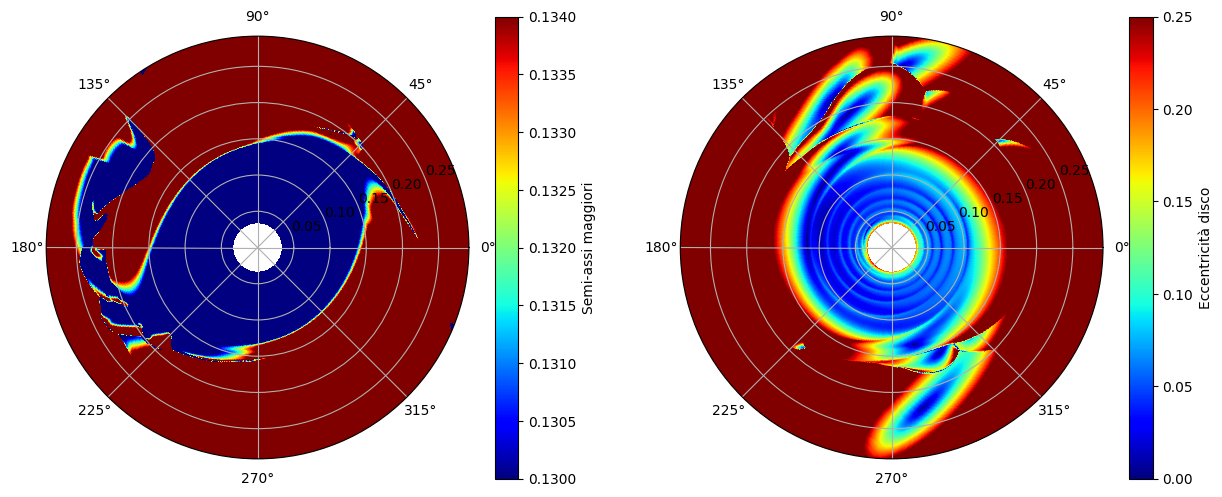

In [23]:
rho = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasdens61.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvx61.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvy61.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.5, 385)
r_plot = np.zeros(384)
rcal = np.zeros((384, 1152))
acal = np.zeros((384, 1152))
uno = np.zeros((384, 1152))
for i in range(0, len(r_plot)):

    #Area delle cellette
    area = np.pi * (r[i+1]**2 - r[i]**2)
    area = area/1152

    #Posizione centrale delle cellette
    r_plot[i] = (r[i+1] + r[i])/2

    for j in range(0, 1152):
        acal[i, j] = area
        rcal[i, j] = r_plot[i]
        uno[i, j] = 1

#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)


ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
sax = - 1/(2 * ene * 12)            #Semi-assi maggiori
mass = rho * acal                       #Massa celle
eps = np.sqrt(uno - ((uno+mass) * rcal * vx)**2/(sax * 12))
eps.reshape(384 * 1152)
#Stampo in coordinate polari la densità del disco e l'energia
#Metto in evidenza le regioni ad energia positiva
fig = plt.figure(figsize=(15, 6))

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, sax, cmap='jet', vmin = 0.130, vmax =0.134)
plt.colorbar(cax, label='Semi-assi maggiori')
ax1.set_rmin(0)
ax1.set_rmax(3.5/12)

#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
cax = ax2.pcolormesh(Theta, R, eps, cmap='jet', vmin = 0, vmax =0.25)
plt.colorbar(cax, label='Eccentricità disco')
ax2.set_rmin(0)
ax2.set_rmax(3.5/12)



#----------------------------------------------#
#      Determino semi-asse di troncamento      #
#----------------------------------------------#
sax.reshape(384 * 1152)
mas.reshape(384 * 1152)

#Creo contenitore per masse progressive 
m_prog = []
sax_mag = np.linspace(0, 0.5, 1000)

#Creo le masse progressive
for i in range(0, len(sax_mag)):
    m_prog.append(mas[sax < sax_mag[i]].sum())

m_prog = np.array(m_prog)
for i in range(0, len(sax_mag)):
    if m_prog[i] >= 0.999 * m_prog[999]:
        ind = i
        break

print("Il raggio di troncamento è: " + str(round(sax_mag[ind], 3)) + " a")




mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
ecc = eps[mask] * mass[mask]
ecc_out = ecc.sum() / mass[mask].sum()

print("L'eccentricità è pari a: " + str(round(ecc_out, 3)))

plt.show()

plt.show()

### Considero mass-ratio per eccentricità fissata

Faccio media pesata sulla massa delle celle

In [5]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)
ecc_A3_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(abs(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h])))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A3_e0[h] = rag.sum()/len(rag)
    ecc_A3_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A3_e0[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A3_e0[h], 3)))


Il raggio di troncamento è: 0.131 a.     L'eccentricità è pari a: 0.106
Il raggio di troncamento è: 0.194 a.     L'eccentricità è pari a: 0.097
Il raggio di troncamento è: 0.22 a.     L'eccentricità è pari a: 0.096
Il raggio di troncamento è: 0.267 a.     L'eccentricità è pari a: 0.11
Il raggio di troncamento è: 0.321 a.     L'eccentricità è pari a: 0.108
Il raggio di troncamento è: 0.354 a.     L'eccentricità è pari a: 0.104
Il raggio di troncamento è: 0.452 a.     L'eccentricità è pari a: 0.092


### Calcolo eccentricità del disco

Il raggio di troncamento è: 0.132 a
L'eccentricità è pari a: 0.42


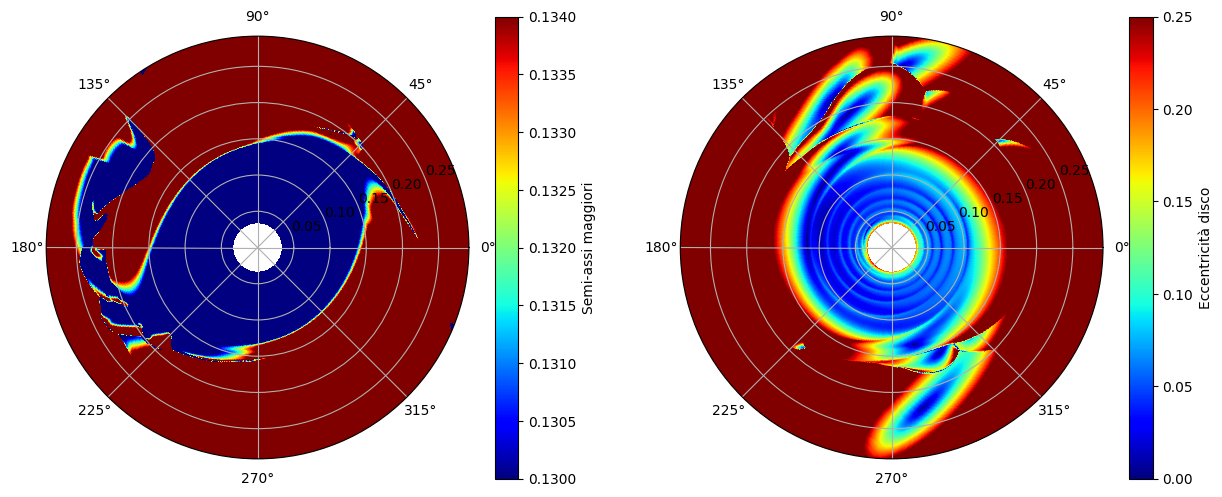

In [6]:
rho = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasdens61.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvx61.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/NoEcc/MR0.1/gasvy61.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 3.5, 385)
r_plot = np.zeros(384)
rcal = np.zeros((384, 1152))
acal = np.zeros((384, 1152))
uno = np.zeros((384, 1152))
for i in range(0, len(r_plot)):

    #Area delle cellette
    area = np.pi * (r[i+1]**2 - r[i]**2)
    area = area/1152

    #Posizione centrale delle cellette
    r_plot[i] = (r[i+1] + r[i])/2

    for j in range(0, 1152):
        acal[i, j] = area
        rcal[i, j] = r_plot[i]
        uno[i, j] = 1

#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)


ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
sax = - 1/(2 * ene * 12)            #Semi-assi maggiori
mass = rho * acal                       #Massa celle
eps = np.sqrt(uno - ((uno+mass) * rcal * vx)**2/(sax * 12))
eps.reshape(384 * 1152)
#Stampo in coordinate polari la densità del disco e l'energia
#Metto in evidenza le regioni ad energia positiva
fig = plt.figure(figsize=(15, 6))

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, sax, cmap='jet', vmin = 0.130, vmax =0.134)
plt.colorbar(cax, label='Semi-assi maggiori')
ax1.set_rmin(0)
ax1.set_rmax(3.5/12)

#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
cax = ax2.pcolormesh(Theta, R, eps, cmap='jet', vmin = 0, vmax =0.25)
plt.colorbar(cax, label='Eccentricità disco')
ax2.set_rmin(0)
ax2.set_rmax(3.5/12)



#----------------------------------------------#
#      Determino semi-asse di troncamento      #
#----------------------------------------------#
sax.reshape(384 * 1152)

#Creo contenitore per masse progressive 
m_prog = []
sax_mag = np.linspace(0, 0.5, 1000)

#Creo le masse progressive
for i in range(0, len(sax_mag)):
    m_prog.append(mass[sax < sax_mag[i]].sum())

m_prog = np.array(m_prog)
for i in range(0, len(sax_mag)):
    if m_prog[i] >= 0.999 * m_prog[999]:
        ind = i
        break

print("Il raggio di troncamento è: " + str(round(sax_mag[ind], 3)) + " a")




mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
ecc = eps[mask] 
ecc_out = ecc.sum() / len(ecc)

print("L'eccentricità è pari a: " + str(round(ecc_out, 3)))

plt.show()

plt.show()

### Pongo limite sulla densità

In [1]:
rho = np.fromfile("../Alpha-3/HighEcc/MR1/gasdens61.dat").reshape(384, 1152)
vx = np.fromfile("../Alpha-3/HighEcc/MR1/gasvx61.dat").reshape(384, 1152)
vy = np.fromfile("../Alpha-3/HighEcc/MR1/gasvy61.dat").reshape(384, 1152)

#Creo la griglia angolare
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo la griglia radiale corretta
r = np.linspace(0.4, 4.0, 385)
r_plot = np.zeros(384)
rcal = np.zeros((384, 1152))
acal = np.zeros((384, 1152))
uno = np.zeros((384, 1152))
for i in range(0, len(r_plot)):

    #Area delle cellette
    area = np.pi * (r[i+1]**2 - r[i]**2)
    area = area/1152

    #Posizione centrale delle cellette
    r_plot[i] = (r[i+1] + r[i])/2

    for j in range(0, 1152):
        acal[i, j] = area
        rcal[i, j] = r_plot[i]
        uno[i, j] = 1

#Creo la griglia richiesta per gli output
Theta, R = np.meshgrid(theta, r_plot/12)


ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
sax = - 1/(2 * ene * 12)            #Semi-assi maggiori
mass = rho * acal                       #Massa celle
eps = np.sqrt(uno - ((uno+mass) * rcal * vx)**2/(sax * 12))
eps.reshape(384 * 1152)
#Stampo in coordinate polari la densità del disco e l'energia
#Metto in evidenza le regioni ad energia positiva
fig = plt.figure(figsize=(15, 6))

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, sax, cmap='jet', vmin = 0.130, vmax =0.134)
plt.colorbar(cax, label='Semi-assi maggiori')
ax1.set_rmin(0)
ax1.set_rmax(4.0/12)

#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
cax = ax2.pcolormesh(Theta, R, eps, cmap='jet', vmin = 0, vmax =0.25)
plt.colorbar(cax, label='Eccentricità disco')
ax2.set_rmin(0)
ax2.set_rmax(4.0/12)



#----------------------------------------------#
#      Determino semi-asse di troncamento      #
#----------------------------------------------#
sax.reshape(384 * 1152)
mass.reshape(384 * 1152)

#Creo contenitore per masse progressive 
m_prog = []
sax_mag = np.linspace(0, 0.5, 1000)

#Creo le masse progressive
for i in range(0, len(sax_mag)):
    m_prog.append(mass[sax < sax_mag[i]].sum())

m_prog = np.array(m_prog)
for i in range(0, len(sax_mag)):
    if m_prog[i] >= 0.999 * m_prog[999]:
        ind = i
        break

print("Il raggio di troncamento è: " + str(round(sax_mag[ind], 3)) + " a")



mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], rho > -8.5)
ecc = eps[mask]
ecc_out = ecc.sum()/len(ecc)

print("L'eccentricità è pari a: " + str(round(ecc_out, 3)))

plt.show()

plt.show()

NameError: name 'np' is not defined

### Lavoro con tutti i mass-ratios

In [13]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)
ecc_A3_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(abs(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h])))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                break

        rag[h] = sax_mag[ind]  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], rho > -8.5)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum()/len(ecc)

    sax_A3_e0[h] = rag.sum()/len(rag)
    ecc_A3_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(rag[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_out[k], 3)))


Il raggio di troncamento è: 0.131 a.     L'eccentricità è pari a: 0.371
Il raggio di troncamento è: 0.193 a.     L'eccentricità è pari a: 0.315
Il raggio di troncamento è: 0.22 a.     L'eccentricità è pari a: 0.282
Il raggio di troncamento è: 0.266 a.     L'eccentricità è pari a: 0.246
Il raggio di troncamento è: 0.321 a.     L'eccentricità è pari a: 0.264
Il raggio di troncamento è: 0.352 a.     L'eccentricità è pari a: 0.223
Il raggio di troncamento è: 0.45 a.     L'eccentricità è pari a: 0.184
